In [1]:
import os
import numpy as np
import math
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
from matplotlib import pyplot as plt
import scipy.io
import glob
import SRModels as model

## Declare network

In [2]:
#Declare Networks

#generator
gen = model.G()
print(gen)  # net architecture
gen.restore_netparam(716)
gen.cuda()
#VDSR trained using simulation data
SR = model.VDSR()
print(SR)
SR.restore_netparam(100)
SR.cuda()
val = torch.utils.data.DataLoader(
        model.myImageFloder(mode = 1),
            batch_size= 1, 
            shuffle= False, 
            num_workers=1, 
            drop_last = False)



G(
  (input): Sequential(
    (0): Conv2d(4, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Dropout(p=0.05)
    (2): LeakyReLU(negative_slope=0.2, inplace)
  )
  (input2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Dropout(p=0.05)
    (2): LeakyReLU(negative_slope=0.2, inplace)
  )
  (layer1): Sequential(
    (0): Conv2d(256, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Dropout(p=0.5)
    (2): LeakyReLU(negative_slope=0.2, inplace)
    (3): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Dropout(p=0.5)
    (5): LeakyReLU(negative_slope=0.2, inplace)
    (6): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Dropout(p=0.5)
    (8): LeakyReLU(negative_slope=0.2, inplace)
    (9): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Dropout(p=0.5)
    (11): LeakyReLU(negative_slope=0.2, inplace)
  )
  (output): Sequential(
  

## Show inputs

torch.Size([5, 192, 192])


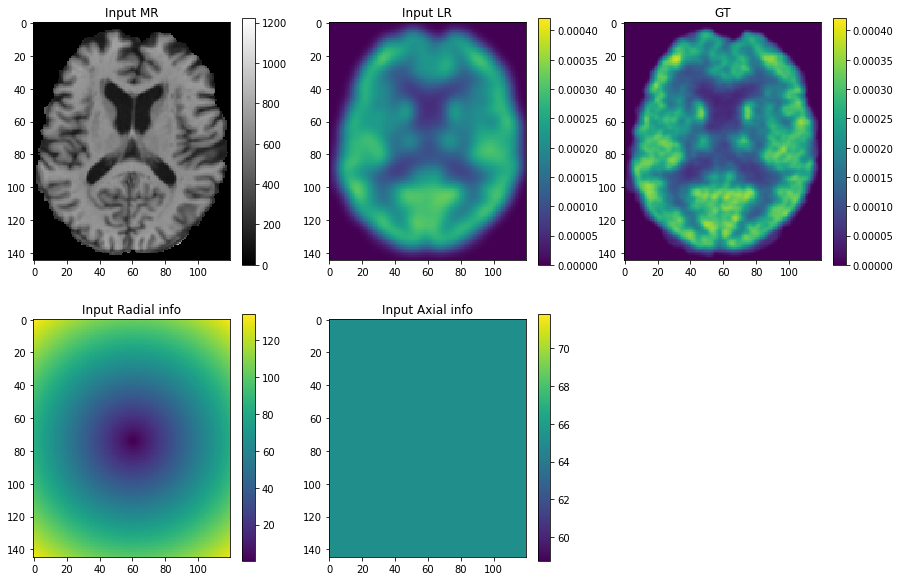

In [3]:
X, pmax, mmax, _ = val.dataset.__getitem__(0)
print(X.size())

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(np.rot90(np.squeeze(X[1,35:155,25:170].numpy())* mmax,1), cmap='gray', vmin=0, vmax=mmax)
plt.title('Input MR')
plt.colorbar()
plt.subplot(2,3,2)
plt.imshow(np.rot90(np.squeeze(X[0,35:155,25:170].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('Input LR')
plt.colorbar()
plt.subplot(2,3,3)
plt.imshow(np.rot90(np.squeeze(X[4,35:155,25:170].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('GT')
plt.colorbar()
plt.subplot(2,3,4)
plt.imshow(np.rot90(np.squeeze(X[2,35:155,25:170].numpy())*255,1), cmap='viridis')
plt.title('Input Radial info')
plt.colorbar()
plt.subplot(2,3,5)
plt.title('Input Axial info')
plt.imshow(np.rot90(np.squeeze(X[3,35:155,25:170].numpy())*128,1), cmap='viridis')
plt.colorbar()


## Predict

In [4]:
# Salloe SR 
in_ch = 4 # # of input channels
for step, (x, pmax, mmax, name) in enumerate(val):

    with torch.no_grad():
        #print x.size()
        temp_x = x.size()[2]
        temp_y = x.size()[3]


        out = torch.FloatTensor(1, in_ch, temp_x, temp_y)
        out1 = torch.FloatTensor(1, 1, temp_x, temp_y)
        out[:,:,:,:] =  x[:,:in_ch,:,:]

        v_input = Variable(out.cuda())
        output = SR(v_input)
        SSSR = gen(v_input, output)
    

## Results

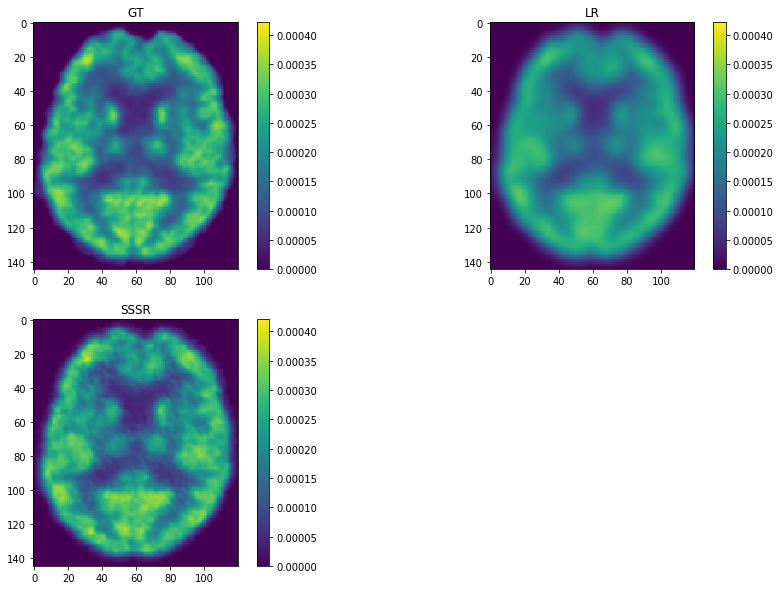

In [5]:
X, pmax, mmax, _ = val.dataset.__getitem__(0)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(np.rot90(np.squeeze(X[4,35:155,25:170].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('GT')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(np.rot90(np.squeeze(X[0,35:155,25:170].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('LR')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(np.rot90(np.squeeze(SSSR[0,0,35:155,25:170].cpu().numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('SSSR')
plt.colorbar()
